In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

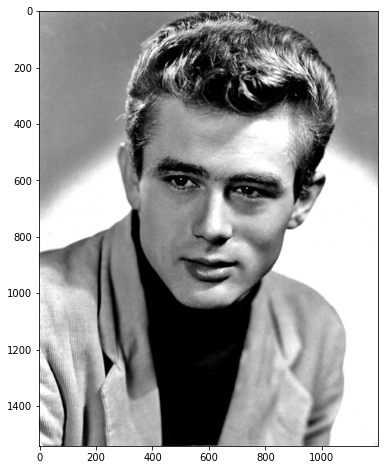

In [2]:
img = mpimg.imread('./face.jpg')

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [3]:
import requests

client_id = "e1iEUsHLl7QJFe8ioK_M"
client_secret = "_QL0Y2FQny"

url = "https://openapi.naver.com/v1/vision/celebrity"
files = {'image': open('./face.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret}
response = requests.post(url, files=files, headers=headers)
           

In [4]:
import json
parsed = json.loads(response.text)
print(json.dumps(parsed,indent=4,sort_keys=False,ensure_ascii=False))
# indent : 들여쓰기, dumps : 보기좋게, ensure_ascii=False : utf-8로 코딩, 한글 표시

{
    "info": {
        "size": {
            "width": 1200,
            "height": 1541
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "정우성",
                "confidence": 0.268063
            }
        }
    ]
}


In [5]:
url = "https://openapi.naver.com/v1/vision/face"
# 얼굴분석 api
files = {'image': open('./face.jpg','rb')}
headers = {'X-Naver-Client-Id':client_id,'X-Naver-Client-Secret':client_secret}
response = requests.post(url,files=files,headers=headers)

parsed = json.loads(response.text)
print(json.dumps(parsed,indent=4,sort_keys=False,ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 1200,
            "height": 1541
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 368,
                "y": 488,
                "width": 539,
                "height": 539
            },
            "landmark": {
                "leftEye": {
                    "x": 499,
                    "y": 590
                },
                "rightEye": {
                    "x": 752,
                    "y": 630
                },
                "nose": {
                    "x": 603,
                    "y": 777
                },
                "leftMouth": {
                    "x": 494,
                    "y": 874
                },
                "rightMouth": {
                    "x": 713,
                    "y": 898
                }
            },
            "gender": {
                "value": "male",
                "confidence": 0.999998
            },
         

In [6]:
dict_sample = {'Name':'pinkwind', 'Age':'None','Class':['beginner','blog']}
dict_sample

{'Name': 'pinkwind', 'Age': 'None', 'Class': ['beginner', 'blog']}

In [7]:
dict_sample.keys()

dict_keys(['Name', 'Age', 'Class'])

In [8]:
dict_sample.values()

dict_values(['pinkwind', 'None', ['beginner', 'blog']])

In [9]:
dict_sample['Class']

['beginner', 'blog']

In [10]:
dict_sample.get('Class')

['beginner', 'blog']

In [11]:
dict_sample.get('Class','nothing')
# key에 해당하는 값을 찾아보고 없으면 뒤에 나오는 단어로 출력

['beginner', 'blog']

In [12]:
dict_sample.get('room','nothing')

'nothing'

In [13]:
customer = {
    'id':'0001',
    'name':'홍길동',
    'history':[
        {'date':'2020-11-20','log':True},
        {'date':'2020-11-21','log':False},        
    ]
}
customer

{'id': '0001',
 'name': '홍길동',
 'history': [{'date': '2020-11-20', 'log': True},
  {'date': '2020-11-21', 'log': False}]}

In [14]:
import json

json_test = json.dumps(customer,indent=4,ensure_ascii=False)
print(json_test)

{
    "id": "0001",
    "name": "홍길동",
    "history": [
        {
            "date": "2020-11-20",
            "log": true
        },
        {
            "date": "2020-11-21",
            "log": false
        }
    ]
}


In [15]:
url = "https://openapi.naver.com/v1/vision/face"
# 얼굴분석 api
files = {'image': open('./face.jpg','rb')}
headers = {'X-Naver-Client-Id':client_id,'X-Naver-Client-Secret':client_secret}
response = requests.post(url,files=files,headers=headers)

detect_result = json.loads(response.text)
detect_result.keys()
# key값을 보는 것
detect_result['faces'][0]
# face라는 key의 값을 보여준다. 데이터가 1개라서 0으로 진입
detect_result['faces'][0]['roi']
# 검출된 얼굴의 좌표
detect_result['faces'][0]['gender']
# 성별 구분

detect_result['faces'][0]['emotion']

{'value': 'neutral', 'confidence': 0.999996}

In [16]:
# 값을 변수에 저장
x,y,w,h = detect_result['faces'][0]['roi'].values()
gender, gen_conf = detect_result['faces'][0]['gender'].values()
emotion, emotion_conf = detect_result['faces'][0]['emotion'].values()
age, age_conf = detect_result['faces'][0]['age'].values()

annotation = gender + ' : ' + str(gen_conf) + \
'\n' + emotion + ' : ' + str(emotion_conf) + \
'\n' + age + ' : ' + str(age_conf)

print(annotation)


male : 0.999998
neutral : 0.999996
25~29 : 0.122281


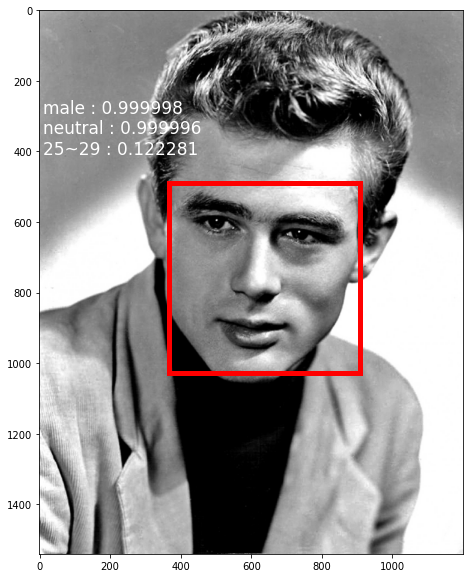

In [17]:
import matplotlib.patches as patches

# 사진 불러오기
img = mpimg.imread('./face.jpg')

fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(img)

# 사각형 정의
rect_face = patches.Rectangle((x,y),w,h,
                             linewidth=5,
                             edgecolor='r',
                             facecolor='none')

# 사각형 patch 표시
ax.add_patch(rect_face)

# annotation표시
plt.text(10,400,annotation,wrap=True,fontsize=17,color='white')
plt.show()

In [28]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image':open('./1451277985681.jpeg','rb')}
#files = {'image':open('./face.jpg','rb')}
headers = {'X-Naver-Client-Id':client_id,
          'X-Naver-Client-Secret':client_secret}

response = requests.post(url,files=files, headers=headers)

detect_result = json.loads(response.text)
detect_result
# 3개의 얼굴이 detect, faceCount = 3

{'info': {'size': {'width': 1616, 'height': 1080}, 'faceCount': 5},
 'faces': [{'roi': {'x': 869, 'y': 465, 'width': 53, 'height': 53},
   'landmark': {'leftEye': {'x': 881, 'y': 477},
    'rightEye': {'x': 904, 'y': 476},
    'nose': {'x': 893, 'y': 489},
    'leftMouth': {'x': 883, 'y': 504},
    'rightMouth': {'x': 905, 'y': 504}},
   'gender': {'value': 'female', 'confidence': 0.99947},
   'age': {'value': '46~50', 'confidence': 0.212977},
   'emotion': {'value': 'talking', 'confidence': 0.905031},
   'pose': {'value': 'frontal_face', 'confidence': 0.999852}},
  {'roi': {'x': 631, 'y': 450, 'width': 47, 'height': 47},
   'landmark': {'leftEye': {'x': 646, 'y': 462},
    'rightEye': {'x': 669, 'y': 465},
    'nose': {'x': 657, 'y': 479},
    'leftMouth': {'x': 645, 'y': 488},
    'rightMouth': {'x': 661, 'y': 489}},
   'gender': {'value': 'female', 'confidence': 0.999584},
   'age': {'value': '19~23', 'confidence': 0.111309},
   'emotion': {'value': 'talking', 'confidence': 0.996489

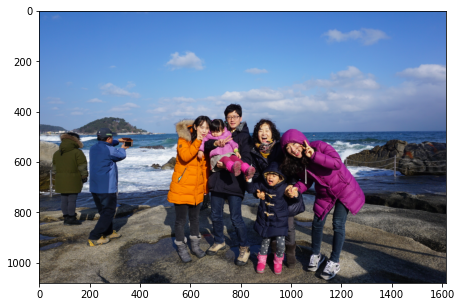

In [19]:
img = mpimg.imread('./1451277985681.jpeg')

fig,ax = plt.subplots(figsize=(16,5))

ax.imshow(img);

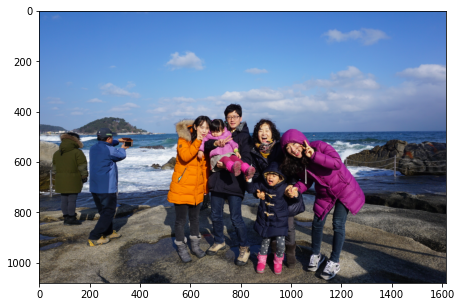

In [20]:
fig

In [21]:
ax

<AxesSubplot:>

In [38]:
json.dumps(detect_result,sort_keys=False,ensure_ascii=False)


'{"info": {"size": {"width": 1616, "height": 1080}, "faceCount": 5}, "faces": [{"roi": {"x": 869, "y": 465, "width": 53, "height": 53}, "landmark": {"leftEye": {"x": 881, "y": 477}, "rightEye": {"x": 904, "y": 476}, "nose": {"x": 893, "y": 489}, "leftMouth": {"x": 883, "y": 504}, "rightMouth": {"x": 905, "y": 504}}, "gender": {"value": "female", "confidence": 0.99947}, "age": {"value": "46~50", "confidence": 0.212977}, "emotion": {"value": "talking", "confidence": 0.905031}, "pose": {"value": "frontal_face", "confidence": 0.999852}}, {"roi": {"x": 631, "y": 450, "width": 47, "height": 47}, "landmark": {"leftEye": {"x": 646, "y": 462}, "rightEye": {"x": 669, "y": 465}, "nose": {"x": 657, "y": 479}, "leftMouth": {"x": 645, "y": 488}, "rightMouth": {"x": 661, "y": 489}}, "gender": {"value": "female", "confidence": 0.999584}, "age": {"value": "19~23", "confidence": 0.111309}, "emotion": {"value": "talking", "confidence": 0.996489}, "pose": {"value": "frontal_face", "confidence": 0.809741}}

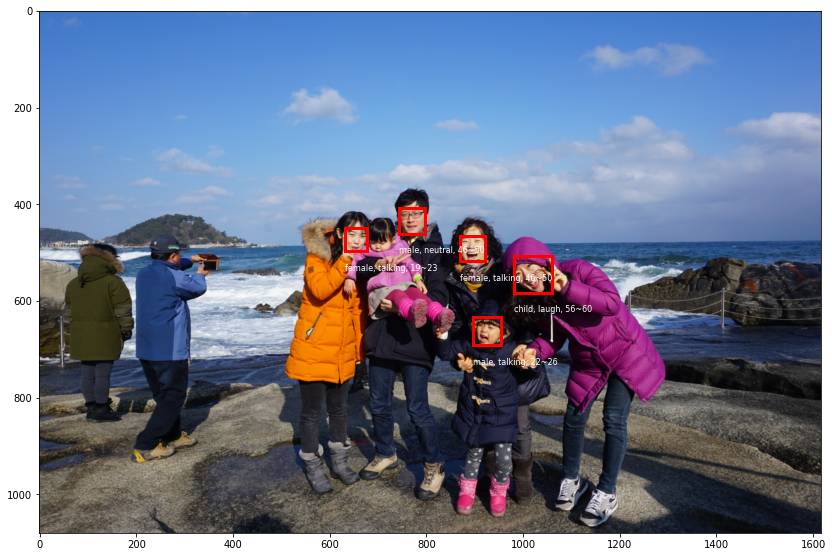

In [31]:
img = mpimg.imread('./1451277985681.jpeg')

fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(img)

for each in detect_result['faces']:
    x,y,w,h = each['roi'].values()
    gender, gender_conf = each['gender'].values()
    emotion, emotion_conf = each['emotion'].values()
    age, age_conf = each['age'].values()
    
    rect_face = patches.Rectangle((x,y),w,h,linewidth=3,edgecolor='r',facecolor='none')
    ant_letter = gender + ', ' + emotion + ', ' + age
    plt.text(x,y+h+40, ant_letter, size=8, color='white')
    ax.add_patch(rect_face)
    
plt.show()
    
